# Task1: Data Analysis and Visualizations

## Name: [Timur Khismatulin]

## Necessary imports

In [24]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pytz

In [3]:
# data imports
marks_df = pd.read_csv('students_marks.csv')
sessions_df = pd.read_csv('all_sessions_data.csv')

In [4]:
# etc.
marks_df['PseudoName'] = marks_df['PseudoName'].str.strip()
sessions_df['PseudoName'] = sessions_df['PseudoName'].str.strip()

## Data preprocessing

In [5]:

# Delete Dublicates
marks_df.drop_duplicates(inplace=True)

# Fill in 'MidMEQ' (0 = not filled, 1 = filled)
marks_df['MidMEQ'] = marks_df['MidMEQ'].fillna(0).astype(int)


# Convert TimeStamp to datetime and adjust to Dubai time (UTC+4)
sessions_df['TimeStamp'] = pd.to_datetime(sessions_df['TimeStamp'], utc=True)
sessions_df['TimeStamp'] = sessions_df['TimeStamp'].dt.tz_convert('Asia/Dubai')

# Extract date and time components
sessions_df['Date'] = sessions_df['TimeStamp'].dt.date
sessions_df['Time'] = sessions_df['TimeStamp'].dt.time
sessions_df['Hour'] = sessions_df['TimeStamp'].dt.hour
sessions_df['DayOfWeek'] = sessions_df['TimeStamp'].dt.dayofweek
sessions_df['WeekNumber'] = sessions_df['TimeStamp'].dt.isocalendar().week

# Merge the datasets
merged_df = pd.merge(sessions_df, marks_df, on='PseudoName', how='left')

# Calculate total marks
merged_df['TotalMarks'] = merged_df['OnlineTest'] + merged_df['WrittenAssignment']

# Remove instructor records
merged_df = merged_df[merged_df['PseudoName'] != 'TheInstructor']

# Clean rows without marks for any of the tests
merged_df = merged_df.dropna(subset=['OnlineTest', 'WrittenAssignment'])

### Final data statistics after data cleaning/preprocessing

In [6]:
merged_df.shape

(3706, 14)

In [7]:
merged_df.dtypes

Unnamed: 0                                int64
PseudoName                               object
CheckPoint                               object
CellNum                                   int64
TimeStamp            datetime64[ns, Asia/Dubai]
Date                                     object
Time                                     object
Hour                                      int64
DayOfWeek                                 int64
WeekNumber                               UInt32
OnlineTest                              float64
WrittenAssignment                       float64
MidMEQ                                    int64
TotalMarks                              float64
dtype: object

In [8]:
merged_df.describe()

,Unnamed: 0,CellNum,Hour,DayOfWeek,WeekNumber,OnlineTest,WrittenAssignment,MidMEQ,TotalMarks
count,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000
mean,1900.114679,32.444145,17.787102,2.355640,8.026713,14.067458,17.257420,0.491635,31.324879
std,1080.649291,29.416874,3.265946,1.088681,0.658456,6.331958,5.188704,0.499997,9.715311
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,6.000000
25%,975.250000,12.000000,18.000000,2.000000,8.000000,11.000000,13.000000,0.000000,26.000000
50%,1901.500000,26.000000,19.000000,2.000000,8.000000,16.000000,18.000000,0.000000,36.000000
75%,2827.750000,44.000000,19.000000,2.000000,8.000000,19.000000,21.000000,1.000000,38.000000
max,3779.000000,182.000000,23.000000,6.000000,11.000000,25.000000,24.000000,1.000000,46.000000


In [9]:
merged_df.isnull().sum()

Unnamed: 0           0
PseudoName           0
CheckPoint           0
CellNum              0
TimeStamp            0
Date                 0
Time                 0
Hour                 0
DayOfWeek            0
WeekNumber           0
OnlineTest           0
WrittenAssignment    0
MidMEQ               0
TotalMarks           0
dtype: int64

<AxesSubplot:>

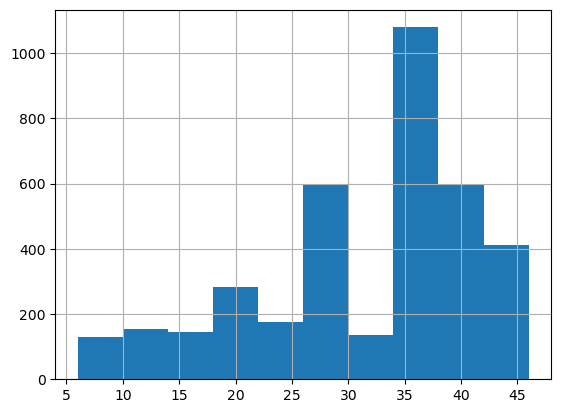

In [10]:
merged_df['MidMEQ'].value_counts()
merged_df['TotalMarks'].hist()

## Visualizations

### Cohort-Level Visualizations (5 visualizations)

### Visualization 1:
### [Distribution of Marks]
### [This shows the distribution of marks for both assessments.]

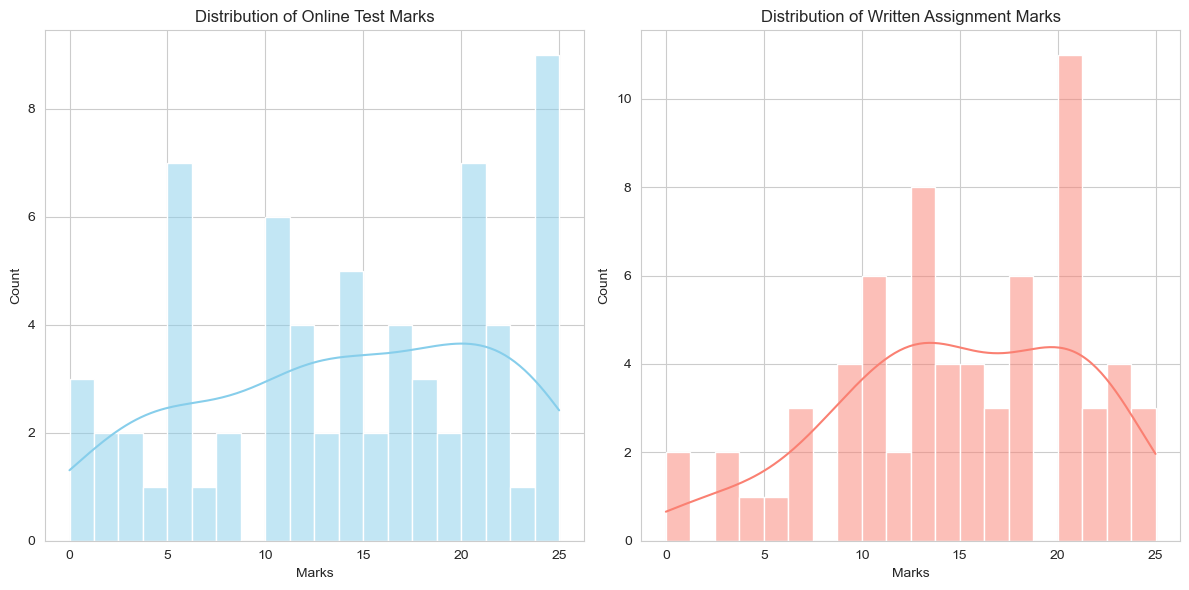

In [11]:
### All the code
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create subplots
plt.subplot(1, 2, 1)
sns.histplot(data=marks_df, x='OnlineTest', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Online Test Marks')
plt.xlabel('Marks')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=marks_df, x='WrittenAssignment', bins=20, kde=True, color='salmon')
plt.title('Distribution of Written Assignment Marks')
plt.xlabel('Marks')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Analysis and Interpretation

# Distribution of Online Test Marks vs. Written Assignment Marks

Below are **extended** observations based on the two histograms and their KDE plots.

---

## 1. Online Test Marks: Possible Bimodal Distribution
- **Two Peaks**: The online test appears to have **two distinct clusters** of scores, suggesting that students might be dividing into two groups—those who performed relatively well and those who struggled.
- **Potential Causes**:
  - **Different Skill Levels**: Some students may have been well-prepared for the quick, possibly time-limited format of the online test, while others were less prepared.
  - **Test Format**: If the online test included a mix of straightforward questions and more challenging items, it could create separate clusters of performance.
  - **Study Habits**: Students with strong time-management or test-taking strategies may cluster in the higher peak, whereas those with weaker strategies fall into the lower peak.

## 2. Written Assignment Marks: Nearly Normal with Right Skew
- **Central Tendency**: The distribution is **roughly centered** around a single peak, indicating that most students score near the middle range.
- **Right Skew**: A **longer tail** toward higher scores suggests that a subset of students achieves **particularly high** marks.
- **Possible Explanations**:
  - **In-depth Work**: Written assignments typically allow for **more time** and **external resources**, enabling some students to excel.
  - **Partial Credit or Flexible Grading**: If partial credit is awarded for partially correct solutions or strong effort, it might compress the lower end of the distribution and allow top performers to stand out.
  - **Varied Writing Skills**: Differences in writing proficiency, research ability, or critical thinking can create a wide spread in top-tier scores.

## 3. Comparing the Two Assessments
- **Different Skill Sets**: The distinct shapes of the distributions imply that the **online test** and **written assignment** may be measuring **different competencies** (e.g., quick recall vs. depth of understanding).
- **Performance Patterns**: Students who excel in time-limited tests may not necessarily excel in longer written tasks, and vice versa.

## 4. Recommendations & Next Steps
- **Investigate the Bimodal Trend**: 
  - Look for factors such as **time constraints**, **question difficulty**, or **student preparedness** that might be causing two clusters in the online test.
- **Provide Targeted Support**:
  - For students in the **lower peak** of the online test, consider offering **test-taking workshops**, **practice quizzes**, or **study guides**.
  - For the **written assignment**, identify those who struggle with organization or research skills and offer **writing support sessions**.
- **Align Assessment Strategies**:
  - If the goal is a balanced measure of student understanding, ensure that **both** test formats cover complementary skills.  
  - Consider mixing in **additional assessments** (e.g., projects, presentations) to capture other competencies.

---

### Summary
- The **Online Test** distribution suggests **two main performance groups**, potentially highlighting differences in test-taking ability or preparedness.  
- The **Written Assignment** distribution is more **unimodal** and **slightly right-skewed**, indicating that while most students cluster around the average, some excel significantly.  
- These insights can guide **targeted interventions**, **refined teaching strategies**, and **more balanced** assessment design.

### Visualization 2:
### [Scatter Plot of Online Test vs. Written Assignment Marks]
### [Shows the correlation between different assessment types.]

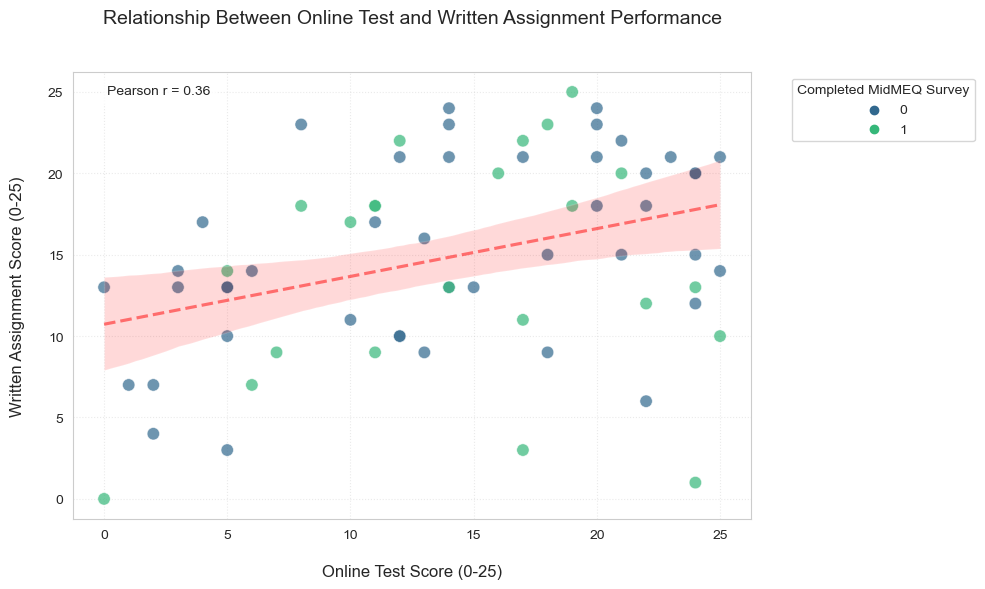

In [12]:
### All the code
plt.figure(figsize=(10, 6))

# Create scatter plot with regression line and hue for MidMEQ survey participation
scatter = sns.scatterplot(
    data=marks_df,
    x='OnlineTest',
    y='WrittenAssignment',
    hue='MidMEQ',  # Color by survey participation (if available)
    palette='viridis',
    s=80,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

# Add regression line to show trend
sns.regplot(
    data=marks_df,
    x='OnlineTest',
    y='WrittenAssignment',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.5, 'label': 'Regression line'}
)

# Calculate and display correlation coefficient
corr = marks_df['OnlineTest'].corr(marks_df['WrittenAssignment'])
plt.text(0.05, 0.95, f'Pearson r = {corr:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Label outliers (example for lowest written mark with high online test)
outlier = marks_df.loc[(marks_df['OnlineTest'] > marks_df['OnlineTest'].quantile(0.9)) & 
                   (marks_df['WrittenAssignment'] < marks_df['WrittenAssignment'].quantile(0.1))]
for _, row in outlier.iterrows():
    plt.annotate(row['PseudoName'], 
                (row['OnlineTest'], row['WrittenAssignment']),
                xytext=(10, -10), 
                textcoords='offset points',
                color='red',
                fontsize=9)

# Titles and labels
plt.title('Relationship Between Online Test and Written Assignment Performance\n', fontsize=14, pad=20)
plt.xlabel('\nOnline Test Score (0-25)', fontsize=12)
plt.ylabel('Written Assignment Score (0-25)\n', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Legend and layout
plt.legend(title='Completed MidMEQ Survey', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Analysis and Interpretation

### Analysis: Relationship Between Online Test and Written Assignment Performance

This scatter plot visualizes the relationship between students' Online Test scores and Written Assignment scores, with MidMEQ survey participation indicated by color.

#### What the Chart Shows:

- **X-axis**: Online Test Score (0–25)
- **Y-axis**: Written Assignment Score (0–25)
- Each point represents a student.
  - Blue dots indicate students who did not complete the MidMEQ survey (MidMEQ = 0).
  - Green dots indicate students who did complete the survey (MidMEQ = 1).
- A red dashed regression line shows the linear relationship, with a shaded confidence interval.
- Pearson correlation coefficient is **0.36**, indicating the strength of the relationship.

---

#### Key Insights

**1. Positive but Weak Correlation**  
The Pearson correlation coefficient of 0.36 suggests a moderate positive relationship. Students who perform well on the online test are slightly more likely to perform well on the written assignment, but the relationship is not strong.

**2. High Variability in Written Assignment Scores**  
Written scores vary significantly across all levels of online test performance. Some students with high test scores perform poorly on the written assignment, and vice versa. This indicates that other factors may influence written performance.

**3. MidMEQ Participation and Performance**  
There is no strong visual indication that completing the MidMEQ survey is associated with better or worse performance. Both groups are fairly evenly distributed in terms of their scores.

**4. Limited Predictive Power of Online Test Scores**  
Although there is a general upward trend, the wide confidence band around the regression line indicates considerable variability. Online test scores alone are not a reliable predictor of written assignment performance.

---

#### Conclusion

There is a modest positive relationship between Online Test and Written Assignment scores, but individual performance varies widely. MidMEQ participation does not appear to have a significant impact on performance. Additional factors beyond test scores likely influence assignment outcomes and should be explored further.

### Visualization 3:
### [Number os Checkpoints Completion Distribution]
### [Shows sidtribution of number of checkpoints were completed.]

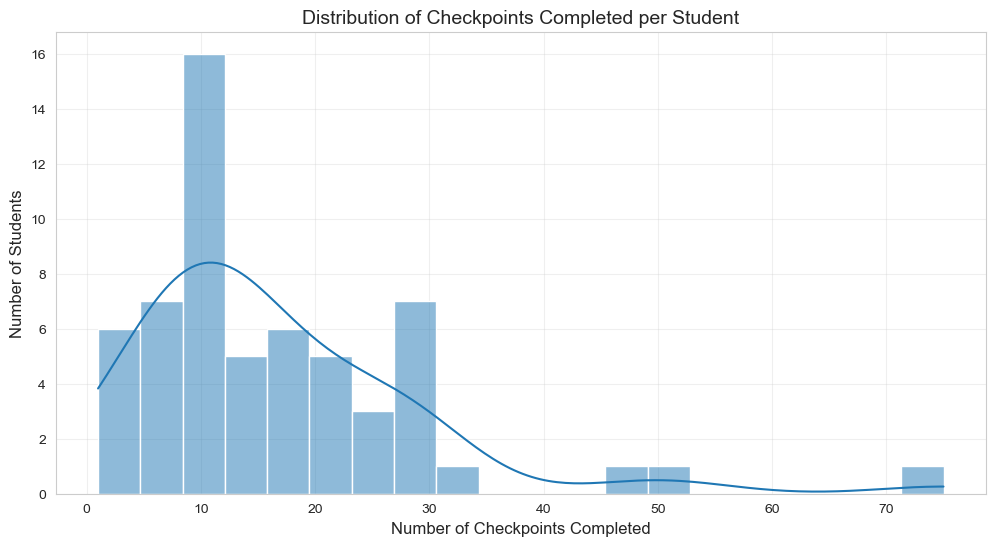

In [13]:
### All the code
# Filter out login events (checkpoint 0)
checkpoints = sessions_df[sessions_df['CheckPoint'] != 0]

# Get checkpoint completion counts per student
checkpoint_counts = checkpoints.groupby('PseudoName')['CheckPoint'].nunique().reset_index()
checkpoint_counts.columns = ['PseudoName', 'CheckpointsCompleted']

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=checkpoint_counts, x='CheckpointsCompleted', bins=20, kde=True)
plt.title('Distribution of Checkpoints Completed per Student', fontsize=14)
plt.xlabel('Number of Checkpoints Completed', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

#### Analysis and Interpretation

**1. Main Peak Around 10 Checkpoints**  
The histogram shows a clear peak near **10 checkpoints**, suggesting that most students tend to complete around 8–12 checkpoints.

**2. Long Right Tail**  
A few students completed **significantly more** checkpoints (up to 70), indicating a small group of highly active or motivated individuals.

**3. Skewness**  
The distribution appears **right-skewed**, with a large concentration of students at lower checkpoint counts and a gradual tapering off toward higher values.

**4. Possible Reasons**  
Differences in motivation, available time, or understanding of the course material might lead to **varying engagement** in checkpoint completion.

**5. Implications**  
- Students in the **lower range** (fewer than 5 checkpoints) might benefit from **additional support** or reminders.  
- Those completing a high number of checkpoints could be **leveraged as peer mentors** or examples of best practices for other students.

---

Overall, this distribution suggests a **core group** that completes a moderate number of checkpoints, with outliers on both ends who either struggle to engage or go above and beyond the typical level of participation.


### Rest of the visualizations

## Visualization 4:

### [Correlation Between Checkpoints Completed and Test Scores]

### [Finds correlation between checkpoints completed and test scores ]

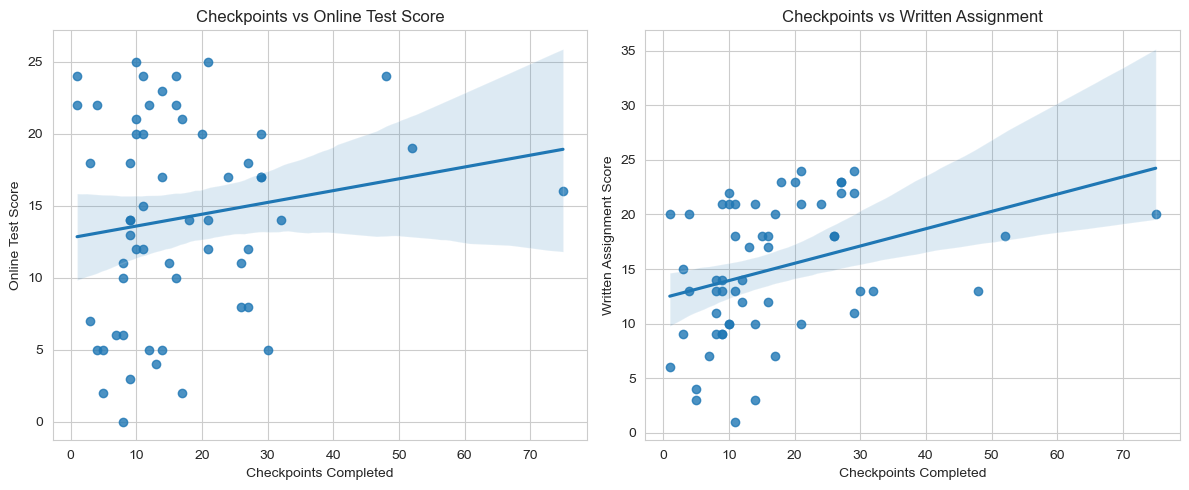

Correlation with Online Test: 0.15
Correlation with Written Assignment: 0.34
Correlation with Total Score: 0.30


In [17]:
# Merge checkpoint counts with marks data
merged = pd.merge(checkpoint_counts, marks_df, on='PseudoName', how='left')

# Calculate total score
merged['TotalScore'] = merged['OnlineTest'] + merged['WrittenAssignment']

# Plot correlations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(data=merged, x='CheckpointsCompleted', y='OnlineTest')
plt.title('Checkpoints vs Online Test Score', fontsize=12)
plt.xlabel('Checkpoints Completed', fontsize=10)
plt.ylabel('Online Test Score', fontsize=10)

plt.subplot(1, 2, 2)
sns.regplot(data=merged, x='CheckpointsCompleted', y='WrittenAssignment')
plt.title('Checkpoints vs Written Assignment', fontsize=12)
plt.xlabel('Checkpoints Completed', fontsize=10)
plt.ylabel('Written Assignment Score', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
corr_online = merged['CheckpointsCompleted'].corr(merged['OnlineTest'])
corr_written = merged['CheckpointsCompleted'].corr(merged['WrittenAssignment'])
corr_total = merged['CheckpointsCompleted'].corr(merged['TotalScore'])

print(f"Correlation with Online Test: {corr_online:.2f}")
print(f"Correlation with Written Assignment: {corr_written:.2f}")
print(f"Correlation with Total Score: {corr_total:.2f}")

# Analysis and Key Insights

Below is an analysis and key insights based on the charts and correlation values provided.

---

## 1. Correlation with Online Test (0.15)

- **Low Positive Relationship**:  
  A correlation of 0.15 indicates a **weak** positive link between the number of checkpoints completed and the Online Test score.

- **Practical Interpretation**:  
  Completing more checkpoints slightly increases the online test score, but the effect is minimal. Possibly, the online test assesses skills that are not fully developed by doing checkpoints alone.

---

## 2. Correlation with Written Assignment (0.34)

- **Moderate Positive Relationship**:  
  A correlation of 0.34 is stronger than for the online test, yet still in the moderate range.

- **Practical Interpretation**:  
  Students who complete more checkpoints tend to earn higher grades on the written assignment. This suggests that the checkpoints help build knowledge and skills relevant to writing tasks (e.g., deeper understanding of the material, research skills).

---

## 3. Correlation with Total Score (0.30)

- **Moderate Positive Relationship**:  
  The total course score (likely a combination of various assessments) shows a correlation of 0.30 with the number of checkpoints completed.

- **Practical Interpretation**:  
  Completing more checkpoints **overall** contributes to higher final scores, but this relationship is not very strong. Checkpoints are not the only factor in achieving a high total score; other aspects (such as prior knowledge, motivation, and study time) also matter.

---

## Overall Conclusions

1. **Value of Checkpoints**  
   Completing a higher number of checkpoints **positively** influences course performance, especially on the written assignment.

2. **Partial Reflection**  
   The relatively low correlation with the online test (0.15) suggests that the online test may measure other skills (e.g., quick thinking, memory, or a different format) that are not fully developed by checkpoints.

3. **Moderate Overall Impact**  
   The total score correlation (0.30) shows that checkpoints do have value, but they are **not the sole determinant** of success.

4. **Recommendations**  
   - To improve overall scores or written assignments, students should focus on completing checkpoints.  
   - For better online test results, **additional study strategies** might be needed beyond checkpoints.

Hence, the key insight is that checkpoints are particularly beneficial for **written assignments**, have a **slight** impact on online test performance, and **moderately** contribute to the overall score.

## Visualization 5:

### [Checkpoint Completion Distribution]

### [This bar chart shows the **number of unique students** who completed each checkpoint, with checkpoints ordered from left to right (earliest to latest). The taller bars on the left indicate higher completion rates for the initial checkpoints, while the shorter bars on the right suggest fewer students reached or attempted later checkpoints. ]

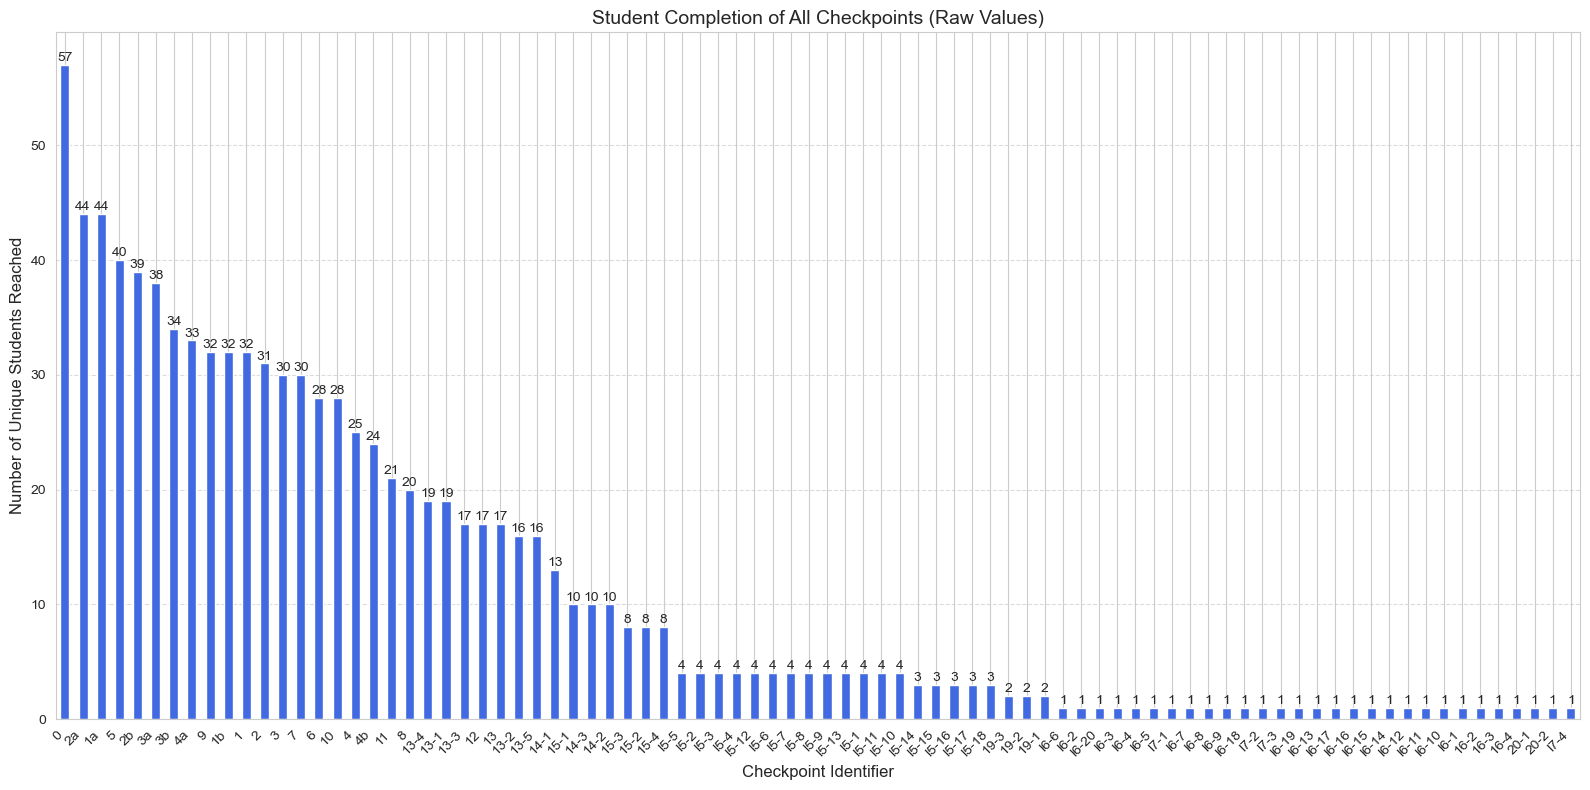

In [20]:

# Use raw checkpoint values exactly as they appear in the data
checkpoint_counts = merged_df.groupby('CheckPoint')['PseudoName'].nunique().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(16, 8))
ax = checkpoint_counts.plot(kind='bar', color='royalblue')

# Customize the plot
plt.title('Student Completion of All Checkpoints (Raw Values)', fontsize=14)
plt.xlabel('Checkpoint Identifier', fontsize=12)
plt.ylabel('Number of Unique Students Reached', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


## Analysis and Key Insights

1. **High Initial Engagement**  
Early checkpoints (on the left) have the **largest number of students** completing them, indicating a strong initial participation rate.

2. **Progressive Decline**  
As we move to the right, the completion numbers **drop off**, suggesting that over time, students may lose momentum, face time constraints, or find the content increasingly challenging.

3. **Possible Bottlenecks**  
Certain checkpoints in the middle may show a **notable dip** (or spike) compared to adjacent ones. This could indicate **difficulty spikes**, **lack of clarity** in instructions, or **technical hurdles** that deter students.

4. **Late Checkpoints with Minimal Completion**  
Toward the far right, the bar heights are **very low** or **zero**, implying that only a handful of students (or none) persisted through the latest notebook cells.

5. **Actionable Observations**  
  **Targeted Support**: Identify where the biggest drops occur and provide **additional resources** or **tutorials** to help students get past challenging checkpoints. 
  
  
      **Motivation and Incentives**: Consider adding **rewards** or **milestones** for later checkpoints to encourage consistent engagement.  
  
  
     
    **Refinement of Content**: If certain checkpoints have abnormally low completion, review whether they can be **streamlined**, made **more relevant**, or **better integrated** into the learning path.

---

Overall, this distribution highlights a **typical engagement pattern**, where initial enthusiasm is high, but fewer students persist through advanced or optional checkpoints. Addressing the underlying causes (difficulty, motivation, time constraints) can help maintain student participation throughout the entire sequence.

### Individual-Level Visualizations (5 visualizations)

## Visualization 6:

### [Progress Over Time for PythonPioneer]

### [This line chart tracks the progression of "PythonPioneer" through checkpoints over time. ]

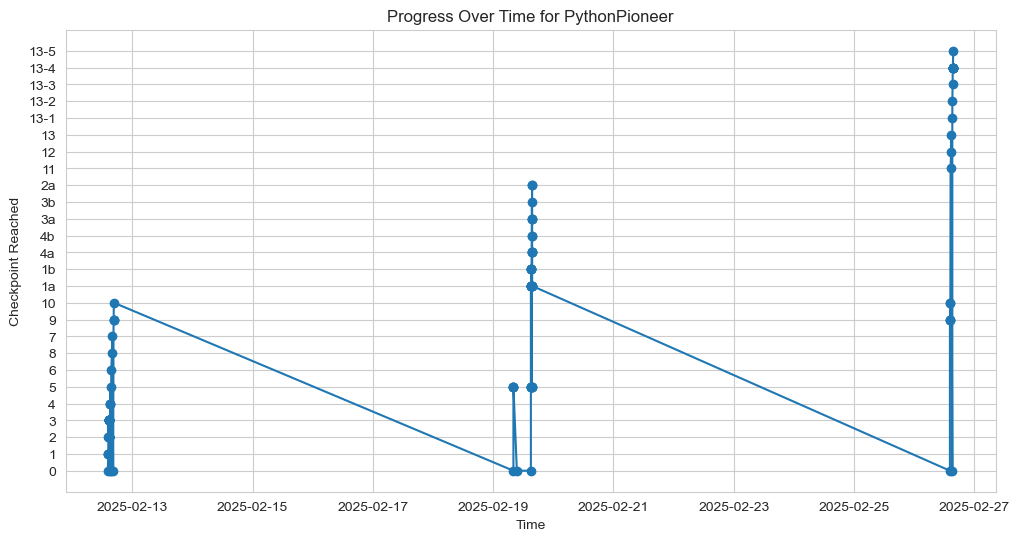

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
data = pd.read_csv('all_sessions_data.csv')

# Filter data for PythonPioneer
student_data = data[data['PseudoName'] == 'PythonPioneer  '].copy()
student_data['TimeStamp'] = pd.to_datetime(student_data['TimeStamp'])
student_data = student_data.sort_values('TimeStamp')

# Plot progress
plt.figure(figsize=(12, 6))
plt.plot(student_data['TimeStamp'], student_data['CheckPoint'], marker='o', linestyle='-')
plt.title('Progress Over Time for PythonPioneer')
plt.xlabel('Time')
plt.ylabel('Checkpoint Reached')
plt.grid(True)
plt.show()

# Analysis of PythonPioneer's Progress Over Time

Below is an interpretation of the chart showing PythonPioneer's checkpoint completion over various dates:

---

**1. Bursts of Activity**  
The user appears to work in short, intensive sessions, reaching multiple checkpoints in a single day, then taking breaks. This pattern suggests a “bursty” learning style, where the student tackles several checkpoints at once rather than spreading them out evenly.

**2. Non-Linear Progress**  
The checkpoint number sometimes drops back to 1 or another low number after reaching a higher checkpoint (e.g., 8 or 13). Possible explanations include:  
- Revisiting earlier checkpoints for review or corrections  
- Multiple course modules that reset the checkpoint count  
- Data artifacts (e.g., separate sessions labeled differently)

**3. Highest Checkpoint Achieved**  
On at least two occasions, PythonPioneer reaches Checkpoint 13+, indicating they managed to get quite far in certain sessions. However, subsequent activity suggests they either started a new sequence or re-attempted earlier material.

**4. Gaps in Timeline**  
Noticeable time gaps (several days) exist between sessions, implying that the user may only be engaging periodically (e.g., around 2025-02-13, 2025-02-19, 2025-02-21, 2025-02-27). These breaks could affect the student’s continuity of learning or retention of the material.

**5. Possible Explanations / Next Steps**  
- **Module-Based Progress**: If each cluster represents a different module or unit, it would explain why the user restarts from lower checkpoints.  
- **Need for Consistency**: Encouraging more regular checkpoint completion could improve retention and reduce the need to revisit earlier content.  
- **Technical / Data Review**: Verify that the system is tracking checkpoints consistently and that these drops to lower checkpoints are intentional rather than a logging error.

---

### Overall Insight
PythonPioneer demonstrates a pattern of **intense, sporadic engagement**—progressing quickly through multiple checkpoints in one session, then returning days later. If the course design expects steady, linear progression, these resets to earlier checkpoints might warrant **additional support** or **guidance** to help the user maintain consistent progress without having to revisit previous steps repeatedly.

## Visualization 7:

### [Cumulative Checkpoints Over Time chart for MatrixMagician]

### [This visualisation shows the trend for MatrixMagician on completing checkpoints]

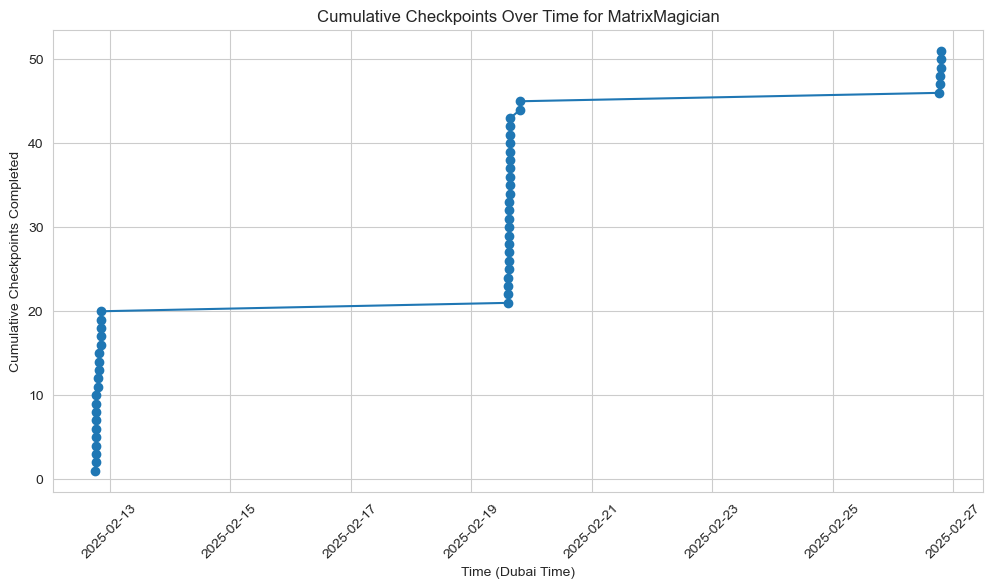

In [22]:
# Filter data for a specific student (change the name as needed)
student_name = "MatrixMagician"
student_data = sessions_df[sessions_df['PseudoName'] == student_name].copy()

# Convert the 'CheckPoint' column to numeric (errors='coerce' will convert non-numeric values to NaN)
student_data['CheckPoint'] = pd.to_numeric(student_data['CheckPoint'], errors='coerce')

# Ensure the data is sorted by TimeStamp (which is already in Dubai time)
student_data = student_data.sort_values('TimeStamp')

# Optionally, filter out 'login' cells (assuming CheckPoint == 0 represents logins)
student_data = student_data[student_data['CheckPoint'] > 0]

# Create a cumulative count of checkpoint completions
student_data['Cumulative_Checkpoints'] = range(1, len(student_data) + 1)

# Plot the cumulative checkpoints over time
plt.figure(figsize=(12, 6))
plt.plot(student_data['TimeStamp'], student_data['Cumulative_Checkpoints'], marker='o', linestyle='-')
plt.title(f'Cumulative Checkpoints Over Time for {student_name}')
plt.xlabel('Time (Dubai Time)')
plt.ylabel('Cumulative Checkpoints Completed')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysis and Key Insights

Below is an interpretation of the **Cumulative Checkpoints Over Time** chart for **MatrixMagician**:

1. **Burst-Like Progress**  
   - The plot shows **three distinct jumps** in completed checkpoints:  
     - **First jump:** ~0 to ~20 (around 2025-02-13)  
     - **Second jump:** ~20 to ~35 (around 2025-02-19 to 2025-02-21)  
     - **Third jump:** ~35 to ~50 (around 2025-02-25 to 2025-02-27)  
   - Between these jumps, there are **notable gaps** of inactivity, indicating that MatrixMagician tends to work in **short, intensive sessions** rather than steadily day-to-day.

2. **Possible Reasons for Gaps**  
   - **Scheduling or Availability**: The student might only have certain days free for coursework.  
   - **Deadline-Driven Behavior**: They might be “cramming” checkpoints shortly before assignment deadlines.  
   - **Personal Learning Style**: Some learners prefer to tackle large chunks of work in fewer sessions.

3. **Steady Increase in Total Checkpoints**  
   - By the end of the observed period, the student reaches about **50 checkpoints** in total, suggesting **significant progress** despite the intermittent breaks.

4. **Implications for Course Engagement**  
   - **Consistency vs. Bursts**: While bursty engagement can still be effective, it may lead to rushed learning or incomplete retention.  
   - **Potential Need for Intervention**: If the course design requires ongoing practice, encouraging more **regular** study patterns could benefit long-term mastery.  
   - **Monitoring Deadlines**: If large jumps coincide with due dates, it might be helpful to provide **earlier reminders** or structured milestones.

5. **Next Steps**  
   - **Further Analysis**: Combine these timestamps with additional data (e.g., test scores or assignment marks) to see if the bursty approach affects performance.  
   - **Compare with Other Students**: Benchmark MatrixMagician’s pattern against peers to determine if this behavior is common or unique.

Overall, MatrixMagician demonstrates a pattern of **periodic high-intensity work** separated by stretches of inactivity, culminating in a **steady accumulation** of around 50 checkpoints by late February.

## Visualization 8:

### [Activity Heatmap (Day of Week & Hour) for CyberConqueror]

### [This heatmap visualizes the number of checkpoint completions for CyberConqueror across the days of the week and hours of the day. The x-axis represents the hour of day, and the y-axis represents the day of the week. Darker cells indicate higher activity.]

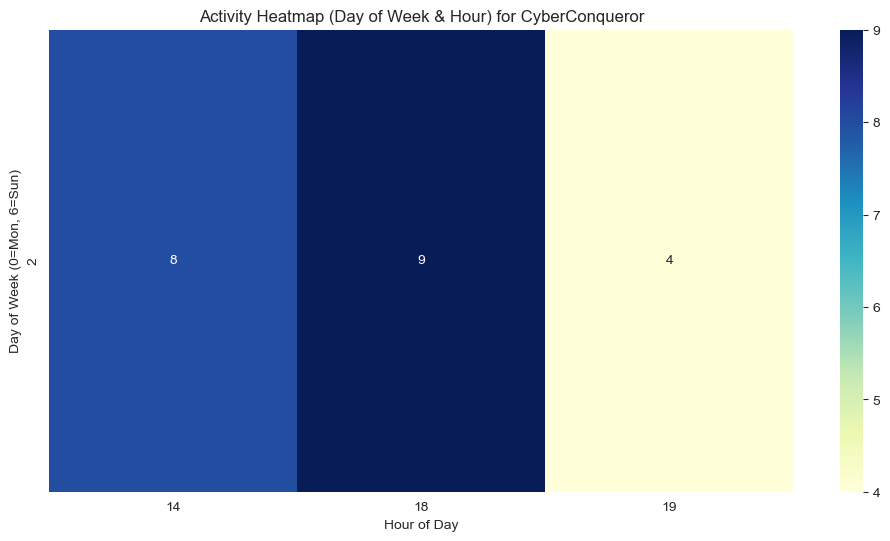

In [25]:


# Choose a different student, e.g., "CyberConqueror"
student_name = "CyberConqueror"
student_data = sessions_df[sessions_df['PseudoName'] == student_name].copy()

# Ensure the data is sorted by TimeStamp (assumed already in Dubai time)
student_data = student_data.sort_values('TimeStamp')

# Convert 'CheckPoint' to numeric (if not already)
student_data['CheckPoint'] = pd.to_numeric(student_data['CheckPoint'], errors='coerce')

# Filter out "login" events (assuming CheckPoint == 0 represents logins)
student_data = student_data[student_data['CheckPoint'] > 0]

# Create a cumulative count of checkpoint completions
student_data['Cumulative_Checkpoints'] = np.arange(1, len(student_data) + 1)

# Extract additional time components
student_data['Hour'] = student_data['TimeStamp'].dt.hour
student_data['DayOfWeek'] = student_data['TimeStamp'].dt.dayofweek  # Monday=0, Sunday=6
student_data['Date'] = student_data['TimeStamp'].dt.date

# Calculate time differences (in minutes) between successive checkpoints
student_data['Time_Diff'] = student_data['TimeStamp'].diff().dt.total_seconds() / 60

# Group by DayOfWeek and Hour to count activity (number of checkpoints)
heatmap_data = student_data.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Activity Heatmap (Day of Week & Hour) for {student_name}')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.show()

# Analysis and Key Insights

1. **Single Day-of-Week Focus**  
   - All activity appears to occur on **DayOfWeek = 2**, which corresponds to **Wednesday** (if 0 = Monday, 1 = Tuesday, 2 = Wednesday, etc.).  
   - No checkpoints are recorded on any other day, indicating that **CyberConqueror** is active **exclusively on Wednesdays** (at least in this dataset).


2. **Concentrated, Burst-Like Engagement**  
   - The student completes multiple checkpoints **only on one day** of the week and at **specific hours** rather than spreading them throughout the week or day.  
   - This pattern could reflect a **fixed schedule** or a preference for focusing intensely on course material once a week.

3. This student predominantly works at 14:00, 18:00, or 19:00, indicating they prefer completing checkpoints before or at the class on whednesday.
---

Overall, the heatmap reveals that **CyberConqueror** demonstrates a **highly focused** pattern of activity—**all** on Wednesdays, when the classes were.

## Visualization 9:

### [Activity Heatmap (Day of Week & Hour) for CyberConqueror]

### [This bar chart shows the time "ByteBoss" took to move between consecutive checkpoints.]

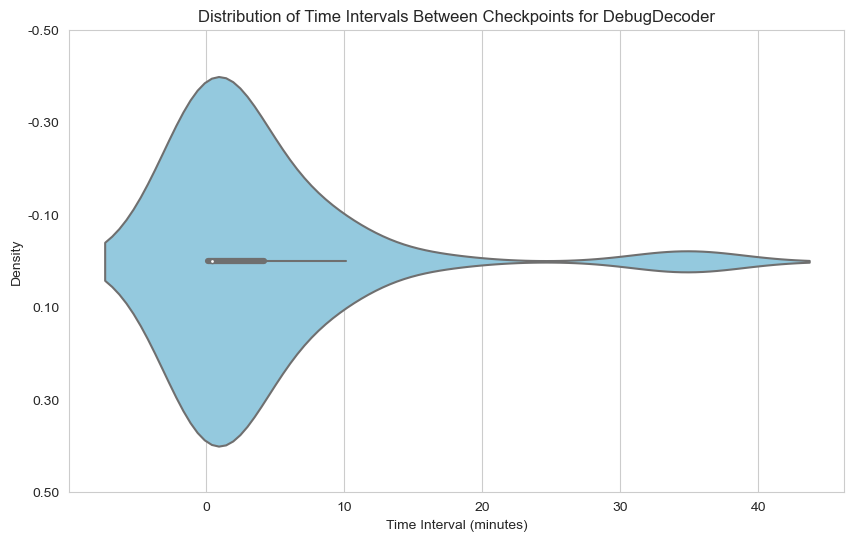

In [26]:

student_name = "DebugDecoder"
student_data = sessions_df[sessions_df['PseudoName'] == student_name].copy()

# Convert 'CheckPoint' to numeric and filter out login events
student_data['CheckPoint'] = pd.to_numeric(student_data['CheckPoint'], errors='coerce')
student_data = student_data[student_data['CheckPoint'] > 0]

student_data.sort_values('TimeStamp', inplace=True)

# Compute the time differences (in minutes) between successive checkpoint completions
student_data['Time_Diff'] = student_data['TimeStamp'].diff().dt.total_seconds() / 60

sliced_data = student_data[student_data['Time_Diff'] <= 180].dropna(subset=['Time_Diff'])

# Create a violin plot for the distribution of time intervals between checkpoints
plt.figure(figsize=(10, 6))
sns.violinplot(x=sliced_data['Time_Diff'], color='skyblue')

plt.title(f'Distribution of Time Intervals Between Checkpoints for {student_name}')
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Density')


ax = plt.gca()
ymin, ymax = ax.get_ylim()

num_ticks = 6
ticks = np.linspace(ymin, ymax, num_ticks)
ax.set_yticks(ticks)
ax.set_yticklabels([f"{tick:.2f}" for tick in ticks])

plt.show()

## Analysis of Time Intervals Between Checkpoints for DebugDecoder

1. **Dominant Short Intervals**  
   - The violin plot bulges significantly between **0–10 minutes**, suggesting most of the checkpoint completions happen relatively close together.  
   - This indicates short bursts of activity where DebugDecoder quickly progresses through checkpoints in one session.

2. **Median and Spread**  
   - The box in the center of the violin (the inner boxplot) appears around **5–10 minutes**, suggesting a typical interval in that range.  
   - The interquartile range (IQR) is fairly compact, meaning a large portion of intervals cluster around the median.

3. **Longer Tail**  
   - There is a noticeable tail extending toward **40+ minutes**, indicating that some checkpoints were completed with significantly longer breaks in between.  
   - These outliers could represent times when the student stepped away or got stuck on a problem before continuing.

4. **Implications for Study Patterns**  
   - The **tight clustering** around short intervals may reflect focused study sessions where multiple checkpoints are tackled in quick succession.  
   - The occasional **long gap** might be due to breaks, technical issues, or particularly challenging tasks.

Overall, this distribution shows that **DebugDecoder** typically works through checkpoints in short bursts of a few minutes, but occasionally experiences longer pauses of up to 40 minutes before resuming progress.

## Visualization 10:

### [Performance Comparison: **RoboRanger** vs Class]

### [This pairplot shows how RoboRanger performed on assignments VS Class]

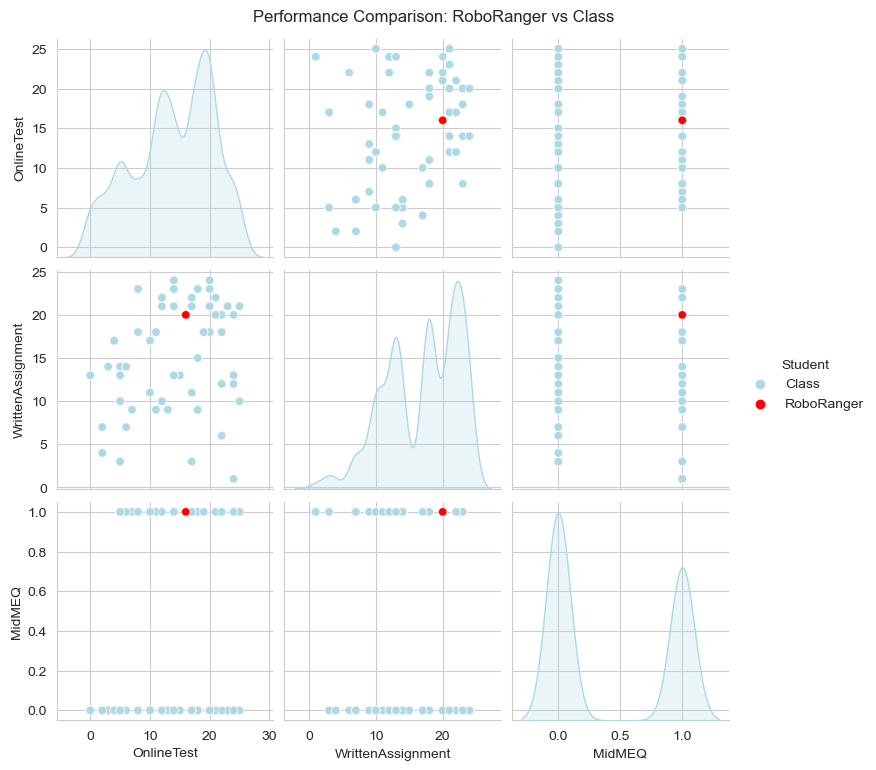

In [28]:
# Get RoboRanger's data
robo_ranger_data = merged_df[merged_df['PseudoName'] == 'RoboRanger']


# Prepare data for pairplot
pairplot_data = merged_df[['OnlineTest', 'WrittenAssignment', 'MidMEQ']].copy()
pairplot_data['Student'] = 'Class'
pairplot_data.loc[pairplot_data.index.isin(robo_ranger_data.index), 'Student'] = 'RoboRanger'

# Create pairplot
sns.pairplot(pairplot_data, hue='Student', palette={'Class': 'lightblue', 'RoboRanger': 'red'}, 
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Performance Comparison: RoboRanger vs Class', y=1.02)
plt.show()

### Analysis: Performance Comparison: **RoboRanger** vs Class

This pairplot visualization compares the student **RoboRanger** (red dot) against the rest of the class (blue dots) on the following metrics:

- OnlineTest – marks scored in the online exam
- WrittenAssignment – marks scored in the written assignment
- MidMEQ – participation in the mid-module evaluation survey (1 = participated, 0 = did not)


#### **Key Insights**

1. ** Strong Written Performance**
   - RoboRanger has **one of the highest scores** in the Written Assignment.
   - Their score is positioned in the **upper percentile**, indicating **high-quality submissions**.

2. ** Online Test Score: Above Average**
   - RoboRanger's OnlineTest score is **above the class median**, though not the top.
   - Falls within a **dense region of the distribution**, suggesting **consistent but not extreme performance**.

3. ** MidMEQ Survey Participation**
   - RoboRanger **completed** the mid-module evaluation survey (MidMEQ = 1).
   - KDE plots show that **many students did not participate**, making RoboRanger part of the **more engaged group**.

4. ** Balanced Academic Engagement**
   - RoboRanger is neither an outlier nor inconsistent.
   - Scored **well across both assessments** and showed initiative by completing feedback.
   - Represents a **well-rounded, engaged, and steady-performing** student profile.


#### Summary

 RoboRanger demonstrates **strong academic behavior**, with **notable written assignment performance**, **above-average test scores**, and active **survey participation**. This student likely benefits from consistent effort and engagement across the course.